In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_blobs
df1 = pd.read_csv(r'dataset_classifiers1.csv')
df2 = pd.read_csv(r'dataset_classifiers2.csv')
df3 = pd.read_csv(r'dataset_classifiers3.csv')
center_gates = [[0,0], [0,1], [1,0], [1,1]]                                             #Posibles valores compuerta AND
gate_X, gate_y = make_blobs(n_samples=100, centers=center_gates, cluster_std=0.1, n_features=2,
                   random_state=0)
yAND = [0 if i<3 else 1 for i in gate_y]
yXOR = [0 if i==0 or i==3 else 1 for i in gate_y]


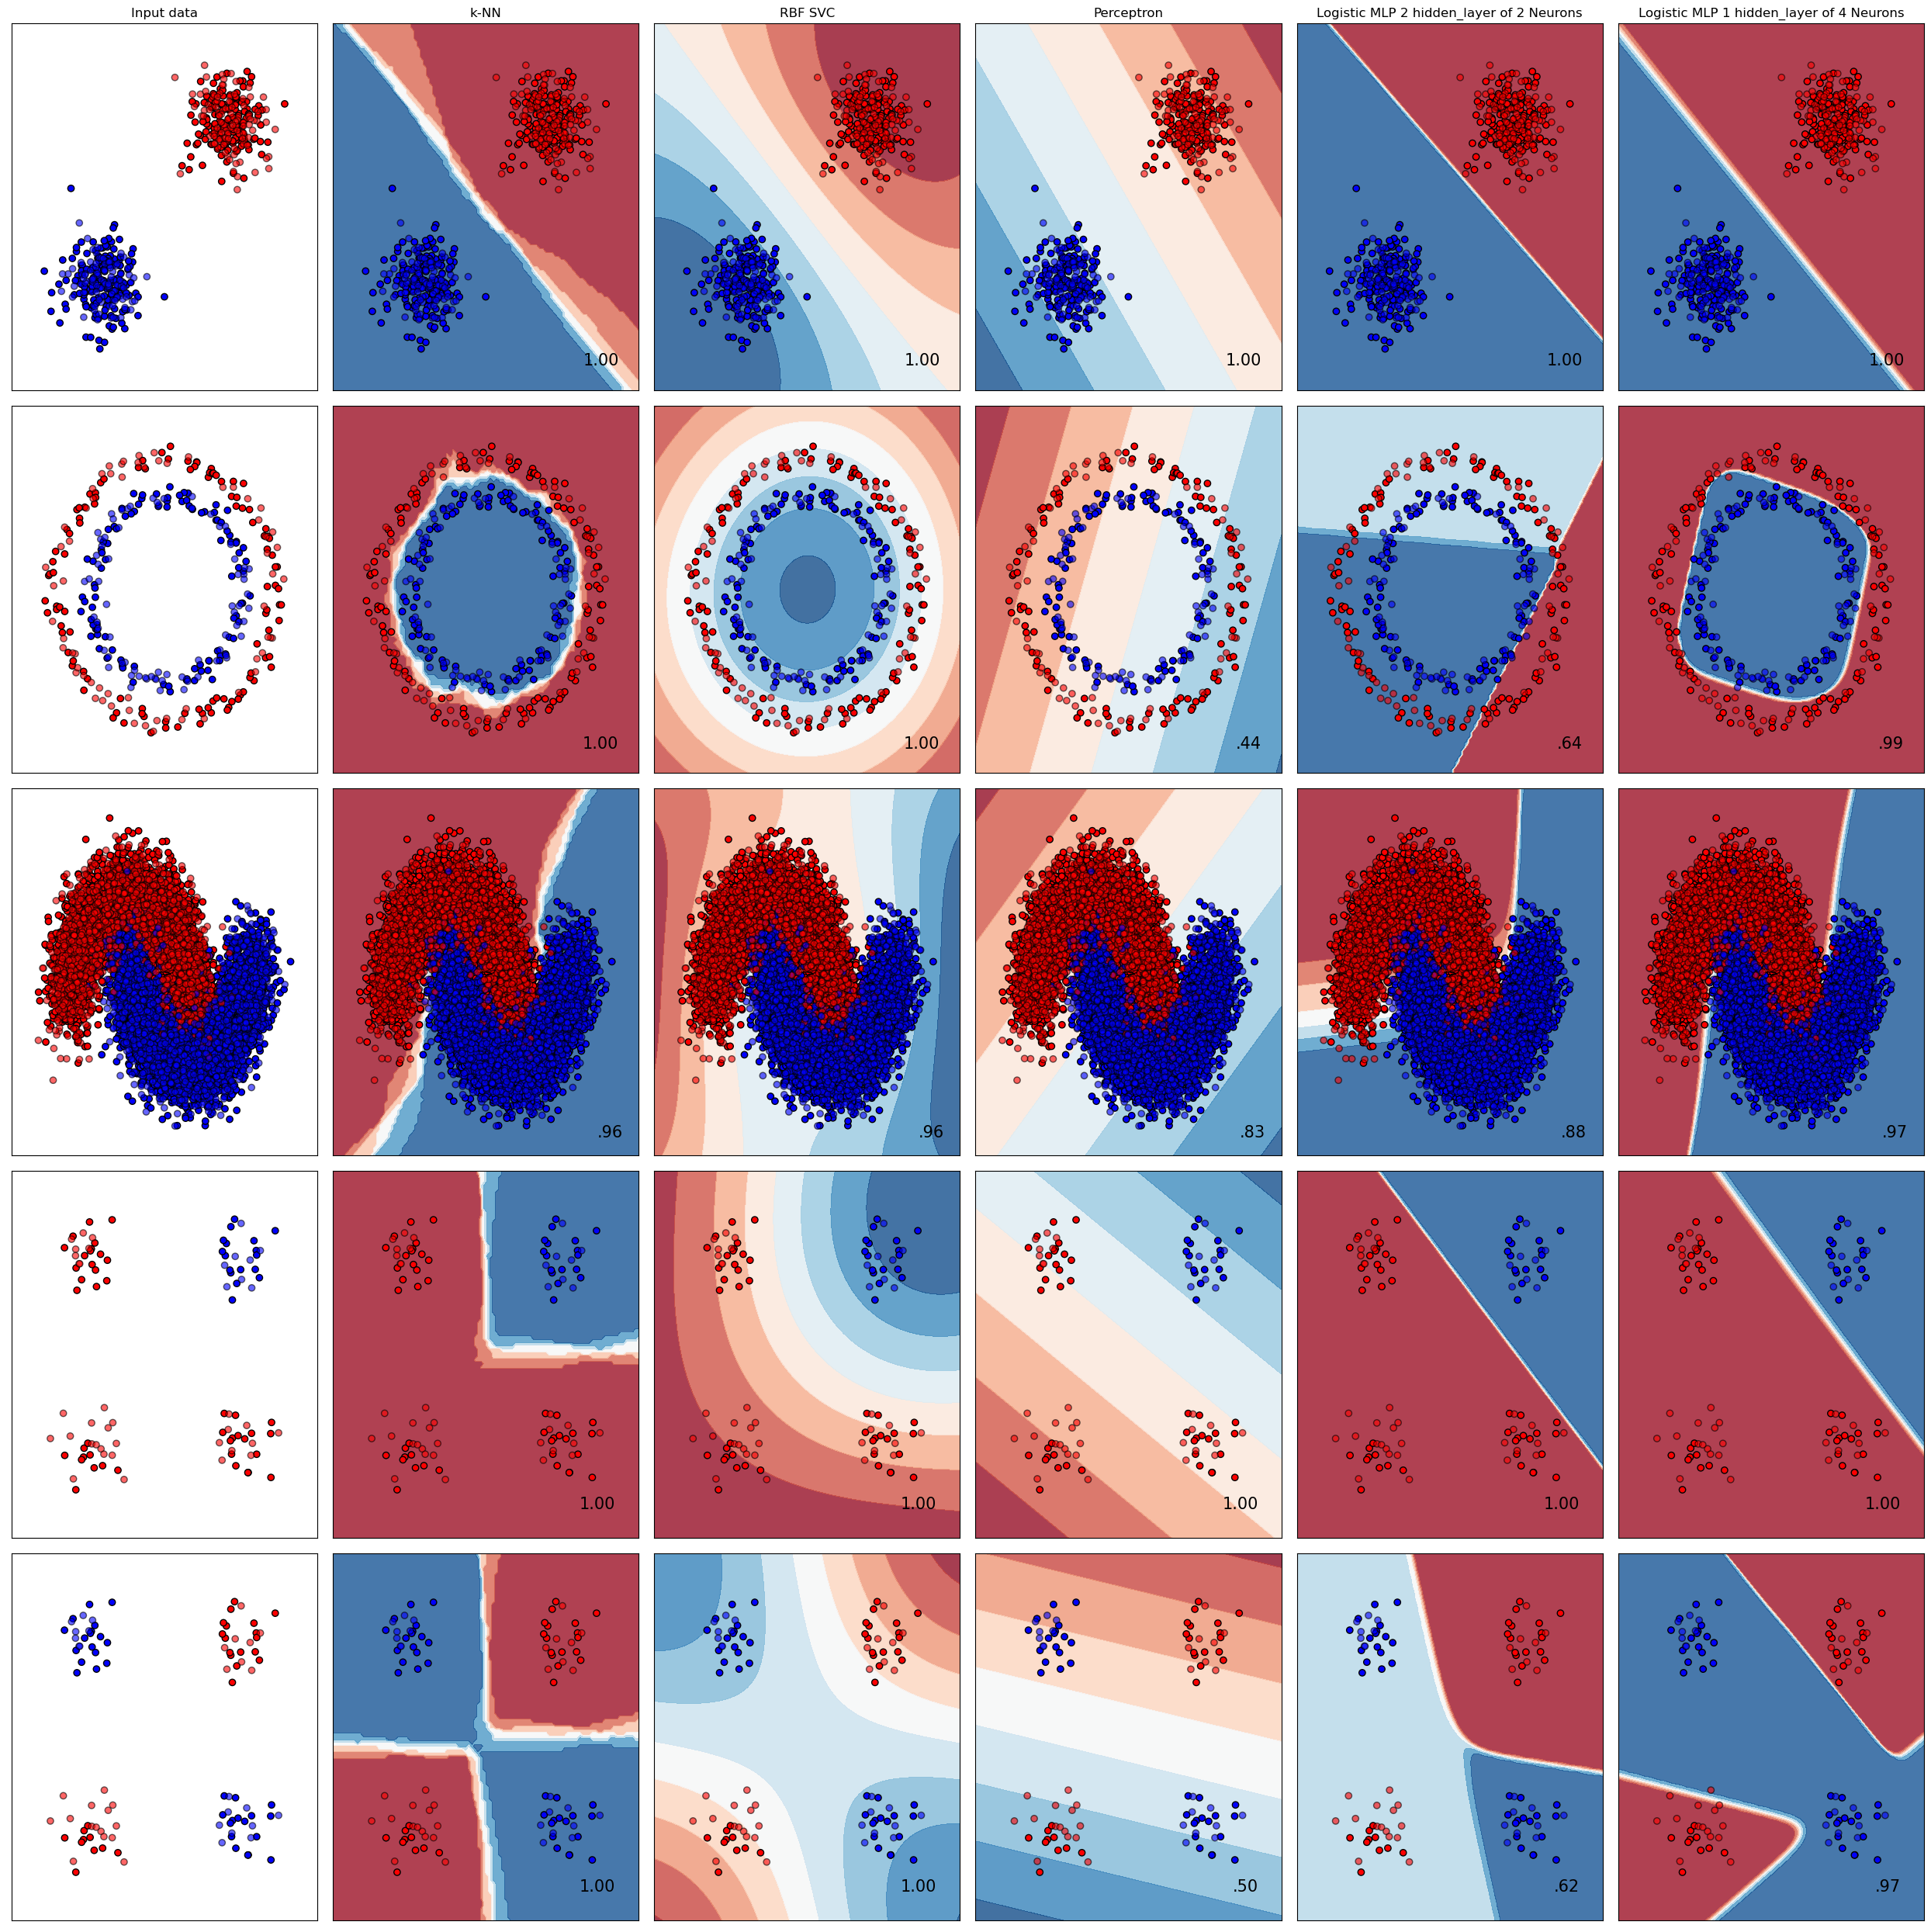

In [2]:
names = [
    "k-NN",
    "RBF SVC",
    "Perceptron",
    "Logistic MLP 2 hidden_layer of 2 Neurons",
    "Logistic MLP 1 hidden_layer of 4 Neurons",
]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(C=10, kernel="rbf", gamma=0.1),
    Perceptron(penalty='l2',alpha=0.0001, max_iter=10,eta0=0.3),
    MLPClassifier(hidden_layer_sizes=(2,2), activation="logistic", solver="lbfgs", max_iter=1000, alpha=0.0001, random_state=1),
    MLPClassifier(hidden_layer_sizes=4, activation="logistic", solver="lbfgs", max_iter=1000, alpha=0.0001, random_state=1),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    [df1.iloc[:,1:3], df1.iloc[:,3]],
    [df2.iloc[:,1:3], df2.iloc[:,3]],
    [df3.iloc[:,0:2], df3.iloc[:,2]],
    [gate_X[:,0:2], yAND],
    [gate_X[:,0:2], yXOR],
]

figure = plt.figure(figsize=(5*len(classifiers), 5*len(datasets)))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [3]:
scores = []
ds_nm = ['dataset_classifiers1', 'dataset_classifiers2', 'dataset_classifiers3', 'AND', 'XOR']
for ds_cnt, ds in enumerate(datasets):
    for clf in classifiers:
        cv_results = cross_validate(clf, ds[0], ds[1], cv=10)
        sorted(cv_results.keys())
        scores.append(cv_results['test_score'])
    print(ds_nm[ds_cnt])
    print(pd.DataFrame(np.transpose(scores), columns=names))
    scores=[]

dataset_classifiers1
   k-NN  RBF SVC  Perceptron  Logistic MLP 2 hidden_layer of 2 Neurons  \
0   1.0      1.0        1.00                                       1.0   
1   1.0      1.0        1.00                                       1.0   
2   1.0      1.0        1.00                                       1.0   
3   1.0      1.0        1.00                                       1.0   
4   1.0      1.0        1.00                                       1.0   
5   1.0      1.0        1.00                                       1.0   
6   1.0      1.0        1.00                                       1.0   
7   1.0      1.0        1.00                                       1.0   
8   1.0      1.0        1.00                                       1.0   
9   1.0      1.0        0.98                                       1.0   

   Logistic MLP 1 hidden_layer of 4 Neurons  
0                                       1.0  
1                                       1.0  
2                         

c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


dataset_classifiers2
   k-NN  RBF SVC  Perceptron  Logistic MLP 2 hidden_layer of 2 Neurons  \
0   1.0      1.0    0.457143                                  0.485714   
1   1.0      1.0    0.428571                                  0.685714   
2   1.0      1.0    0.428571                                  0.628571   
3   1.0      1.0    0.485714                                  0.485714   
4   1.0      1.0    0.628571                                  0.742857   
5   1.0      1.0    0.571429                                  0.771429   
6   1.0      1.0    0.257143                                  0.542857   
7   1.0      1.0    0.600000                                  0.657143   
8   1.0      1.0    0.485714                                  0.628571   
9   1.0      1.0    0.485714                                  0.714286   

   Logistic MLP 1 hidden_layer of 4 Neurons  
0                                  0.657143  
1                                  1.000000  
2                         

KeyboardInterrupt: 